#Image Classification using CNN for CIFAR-10 


### 1. Import libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import random
import numpy as np
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop,SGD,Adam
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Load your data and print the shape of training and test samples

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


### 3. Print the shape of one image (is it 32 x 32 x 3 numpy array ?)

In [ ]:
x_train[444].shape

(32, 32, 3)

### 4. Display one image using imshow() function

[9]


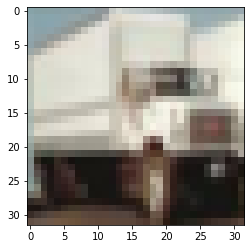

In [ ]:
print(y_train[444])
plt.imshow(x_train[444])

### 5. Convert y_train and y_test into categorical values

In [ ]:
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [ ]:
class_names = ['airplane','car','bird','dog','cat','deer','frog','horse','ship','truck']

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

### 6. Convert train data into float and scale

In [ ]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

### 7. Build your first CNN

In [ ]:
INPUT_SHAPE = (32,32,3)

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), strides=(2,2),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model.add(Conv2D(filters=32, kernel_size=(5,5),strides=(2,2), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))

model.add(Dropout(rate=0.5))

model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

### 8. Print summary and verify your configuration

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 16, 16, 32)        2432      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)              

### 9. Compile and fit and validate your model with the following parameters

In [ ]:
model.compile(optimizer=RMSprop(0.00005,1e-6),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=32,epochs=15,verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/15
1250/1250 - 12s - loss: 2.1423 - accuracy: 0.2083 - val_loss: 1.9224 - val_accuracy: 0.3265
Epoch 2/15
1250/1250 - 11s - loss: 1.8894 - accuracy: 0.3147 - val_loss: 1.7713 - val_accuracy: 0.3727
Epoch 3/15
1250/1250 - 11s - loss: 1.7858 - accuracy: 0.3535 - val_loss: 1.6951 - val_accuracy: 0.3996
Epoch 4/15
1250/1250 - 11s - loss: 1.7226 - accuracy: 0.3766 - val_loss: 1.6587 - val_accuracy: 0.4119
Epoch 5/15
1250/1250 - 11s - loss: 1.6736 - accuracy: 0.3948 - val_loss: 1.6026 - val_accuracy: 0.4269
Epoch 6/15
1250/1250 - 11s - loss: 1.6323 - accuracy: 0.4091 - val_loss: 1.5602 - val_accuracy: 0.4420
Epoch 7/15
1250/1250 - 11s - loss: 1.6064 - accuracy: 0.4190 - val_loss: 1.5292 - val_accuracy: 0.4560
Epoch 8/15
1250/1250 - 11s - loss: 1.5787 - accuracy: 0.4310 - val_loss: 1.5022 - val_accuracy: 0.4666
Epoch 9/15
1250/1250 - 11s - loss: 1.5525 - accuracy: 0.4381 - val_loss: 1.4955 - val_accuracy: 0.4727
Epoch 10/15
1250/1250 - 13s - loss: 1.5345 - accuracy: 0.4462 - val_loss:

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.3927862644195557
Test accuracy: 0.51419997215271


### 10. Exercise

#### 1. Build a more complicated model with the following pattern: Conv -> Conv-> MaxPool -> Conv-> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

#### 2. Use strides of 1 for all convolutional layers.

#### 3. How many parameters does your model have? How does that compare to the previous model?

#### 4. Train it for 5 epochs. What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

#### 5. Try different structures and run times, and see how accurate your model can be.


# Model1

In [ ]:
INPUT_SHAPE = (32,32,3)

model1 = Sequential()

model1.add(Conv2D(filters=64, kernel_size=(5,5), strides=(1,1),activation='relu', padding='same', input_shape=INPUT_SHAPE))

model1.add(Conv2D(filters=32, kernel_size=(4,4),strides=(1,1), activation='relu', padding='same', input_shape=INPUT_SHAPE))

model1.add(MaxPooling2D(pool_size=(2,2)))

model1.add(Flatten())

model1.add(Dense(512, activation='relu'))
model1.add(Dense(256, activation='relu'))

model1.add(Dense(10, activation='softmax'))

In [ ]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        32800     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dense_5 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_6 (Dense)              (None, 10)               

In [ ]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model1.fit(x_train,y_train,batch_size=16,epochs=15,verbose=2,validation_split=0.2,shuffle=True)

Epoch 1/15
2500/2500 - 175s - loss: 1.5021 - accuracy: 0.4564 - val_loss: 1.2974 - val_accuracy: 0.5408
Epoch 2/15
2500/2500 - 193s - loss: 1.1132 - accuracy: 0.6039 - val_loss: 1.0787 - val_accuracy: 0.6254
Epoch 3/15
2500/2500 - 183s - loss: 0.8665 - accuracy: 0.6933 - val_loss: 1.0872 - val_accuracy: 0.6393
Epoch 4/15
2500/2500 - 182s - loss: 0.6368 - accuracy: 0.7746 - val_loss: 1.1180 - val_accuracy: 0.6443
Epoch 5/15
2500/2500 - 183s - loss: 0.4450 - accuracy: 0.8438 - val_loss: 1.3444 - val_accuracy: 0.6261
Epoch 6/15
2500/2500 - 191s - loss: 0.3006 - accuracy: 0.8943 - val_loss: 1.5416 - val_accuracy: 0.6353
Epoch 7/15
2500/2500 - 188s - loss: 0.2152 - accuracy: 0.9266 - val_loss: 1.8568 - val_accuracy: 0.6146
Epoch 8/15
2500/2500 - 182s - loss: 0.1725 - accuracy: 0.9420 - val_loss: 2.1555 - val_accuracy: 0.6189
Epoch 9/15
2500/2500 - 186s - loss: 0.1452 - accuracy: 0.9526 - val_loss: 2.0869 - val_accuracy: 0.6272
Epoch 10/15
2500/2500 - 186s - loss: 0.1363 - accuracy: 0.9563 -

In [ ]:
score = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 3.1400527954101562
Test accuracy: 0.6053000092506409


 # Model2

In [ ]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model2.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.2))

model2.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model2.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model2.add(MaxPooling2D())
model2.add(Dropout(0.3))

model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(10, activation='softmax'))

model2.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
model2.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 64)        

In [ ]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2 = model2.fit(x_train,y_train,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5912 - accuracy: 0.4190
Epoch 2/10
1563/1563 [==============================] - 74s 47ms/step - loss: 1.2124 - accuracy: 0.5685
Epoch 3/10
1563/1563 [==============================] - 74s 48ms/step - loss: 1.0567 - accuracy: 0.6283
Epoch 4/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.9621 - accuracy: 0.6638
Epoch 5/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8898 - accuracy: 0.6886
Epoch 6/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.8257 - accuracy: 0.7114
Epoch 7/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.7869 - accuracy: 0.7238
Epoch 8/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7532 - accuracy: 0.7387
Epoch 9/10
1563/1563 [==============================] - 74s 48ms/step - loss: 0.7276 - accuracy: 0.7451
Epoch 10/10
1563/1563 [==============================] - 75s 48m

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6964384913444519
Test accuracy: 0.7613999843597412


 # Model3

In [ ]:
import tensorflow as tf

In [ ]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model3.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.2))

model3.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model3.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.3))

model3.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model3.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model3.add(MaxPooling2D())
model3.add(Dropout(0.4))

model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(10, activation='softmax'))

model3.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
model3.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 8, 8, 64)         

In [ ]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history3 = model3.fit(x_train,y_train,epochs=10,verbose=1)

Epoch 1/10
1563/1563 [==============================] - 98s 62ms/step - loss: 1.7149 - accuracy: 0.3627
Epoch 2/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.3060 - accuracy: 0.5319
Epoch 3/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.1653 - accuracy: 0.5870
Epoch 4/10
1563/1563 [==============================] - 97s 62ms/step - loss: 1.0647 - accuracy: 0.6236
Epoch 5/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9906 - accuracy: 0.6520
Epoch 6/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.9458 - accuracy: 0.6709
Epoch 7/10
1563/1563 [==============================] - 98s 62ms/step - loss: 0.9033 - accuracy: 0.6853
Epoch 8/10
1563/1563 [==============================] - 97s 62ms/step - loss: 0.8687 - accuracy: 0.6963
Epoch 9/10
1563/1563 [==============================] - 100s 64ms/step - loss: 0.8376 - accuracy: 0.7093
Epoch 10/10
1563/1563 [==============================] - 98s 63

In [ ]:
score = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.7111510634422302
Test accuracy: 0.7573999762535095


 # Model4

In [ ]:
model4 = Sequential()
model4.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32,32,3)))
model4.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.2))

model4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model4.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.3))

model4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model4.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model4.add(MaxPooling2D())
model4.add(Dropout(0.4))

model4.add(Flatten())
model4.add(Dense(128, activation='relu'))
model4.add(Dropout(0.4))
model4.add(Dense(10, activation='softmax'))

model4.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
model4.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_34 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 8, 8, 64)        

In [ ]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history4 = model4.fit(x_train,y_train,epochs=30,verbose=1)

Epoch 1/30
1563/1563 [==============================] - 98s 62ms/step - loss: 1.6767 - accuracy: 0.3736
Epoch 2/30
1563/1563 [==============================] - 97s 62ms/step - loss: 1.2842 - accuracy: 0.5396
Epoch 3/30
1563/1563 [==============================] - 98s 62ms/step - loss: 1.1160 - accuracy: 0.6048
Epoch 4/30
1563/1563 [==============================] - 102s 65ms/step - loss: 1.0198 - accuracy: 0.6412
Epoch 5/30
1563/1563 [==============================] - 99s 63ms/step - loss: 0.9509 - accuracy: 0.6660
Epoch 6/30
1563/1563 [==============================] - 99s 64ms/step - loss: 0.8953 - accuracy: 0.6868
Epoch 7/30
1563/1563 [==============================] - 99s 63ms/step - loss: 0.8570 - accuracy: 0.7038
Epoch 8/30
1563/1563 [==============================] - 99s 63ms/step - loss: 0.8297 - accuracy: 0.7090
Epoch 9/30
1563/1563 [==============================] - 99s 63ms/step - loss: 0.7995 - accuracy: 0.7191
Epoch 10/30
1563/1563 [==============================] - 102s 6

In [ ]:
score = model4.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6298004388809204
Test accuracy: 0.7901999950408936
